<a href="https://colab.research.google.com/github/Kim-JHyun/RPA_Web/blob/main/11_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5_%EB%B3%B4%ED%97%98%EB%A3%8C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보험료 예측하기


In [ ]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import missingno

import scipy

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

### 1. 데이터 불러오기



In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.679854,1.094918,13270.422265
std,14.049960,6.093864,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2. EDA

#### 1) 데이터 중복 제거

In [ ]:
# 중복된 항목 수 알아보기
len(data[data.duplicated()])

1

In [ ]:
# 중복된 항목 확인
# keep은 반환할 값에 대한 옵션 = 'first(첫번째)', 'last(마지막)', False(전부)
data[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# 중복된 항목 제거
data.drop_duplicates(inplace=True, keep='first')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# 데이터 결측치 확인
data.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

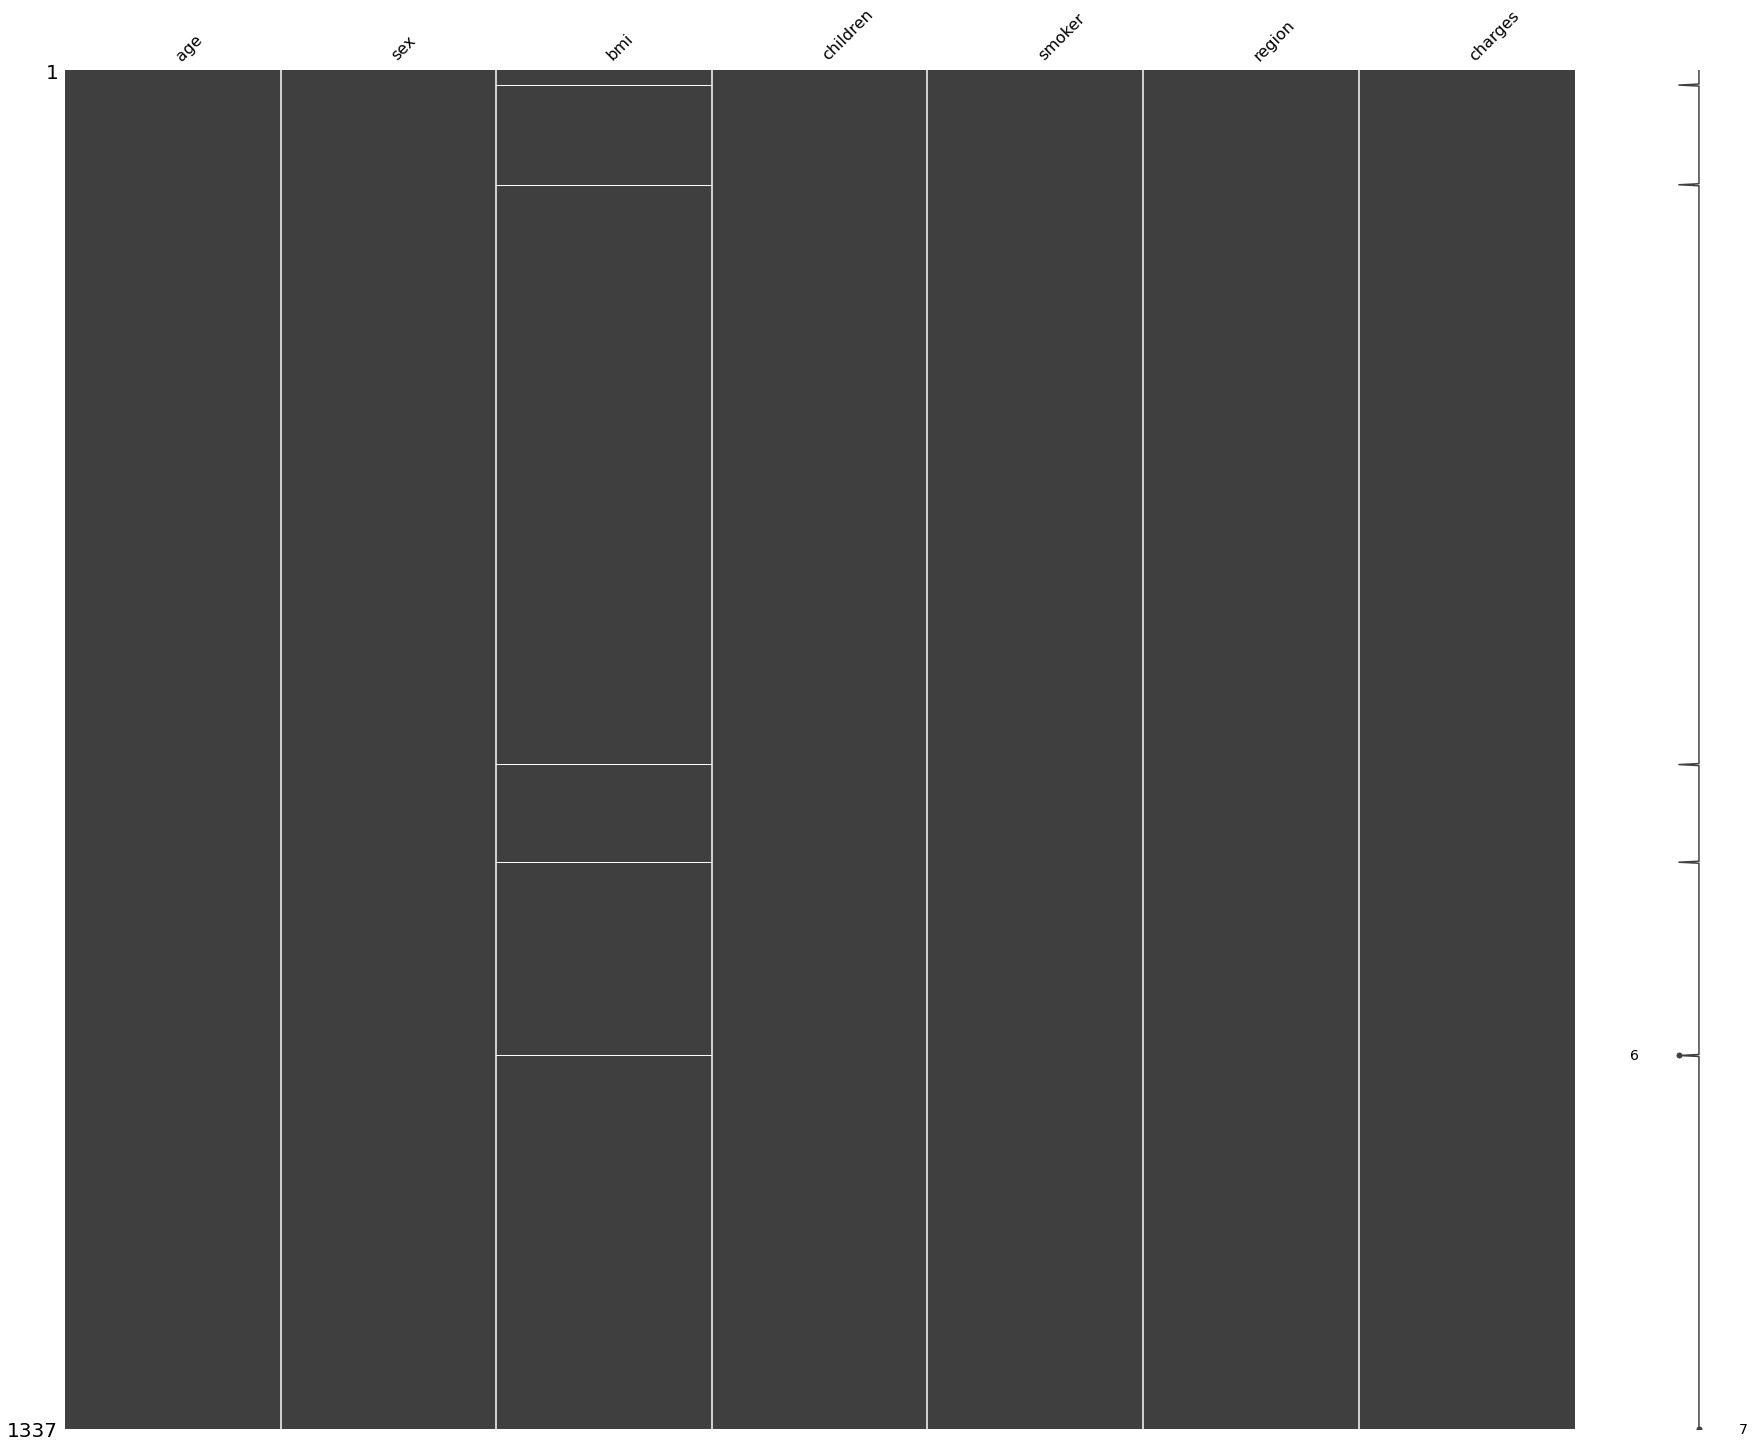

In [ ]:
# missingno 패키지를 통해 시각화 확인
missingno.matrix(data, figsize = (30,25))

In [ ]:
# bmi 평균값
data['bmi'].mean()

30.67992117117115

In [ ]:
# NULL 값을 평균값으로 대체하기
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [ ]:
# 데이터 결측치 확인
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### 2) 범주형 데이터 선택 여부 결정

<AxesSubplot:xlabel='sex', ylabel='count'>

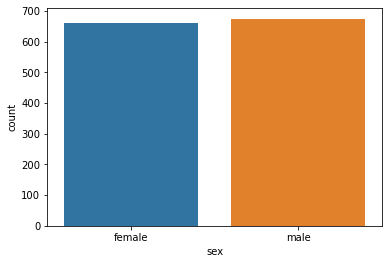

In [ ]:
# 범주형 변수 시각화를 통한 상세 내용 확인

sns.countplot(data = data, x = 'sex')


<AxesSubplot:xlabel='smoker', ylabel='count'>

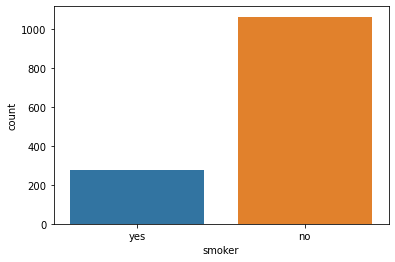

In [ ]:
sns.countplot(data = data, x = 'smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

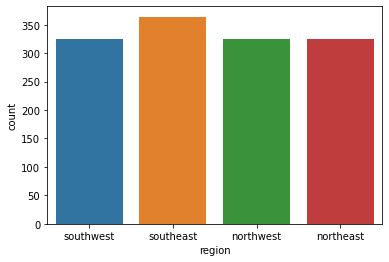

In [ ]:
sns.countplot(data = data, x = 'region')

### 3) 범주형 변수를 더미변수로 변환

In [ ]:
# 범주형 데이터를 범주를 숫자로 변환
# data['Sex'].replace(['male','female'],[0,1],inplace=True)
# titanic['smoker'].replace(['no','yes'],[0,1],inplace=True)
# titanic['region'].replace(['southwest','southeast','northwest','northeast'],[0,1,2,3],inplace=True)

In [ ]:
# 범주형 변수는 더미변수로 변환
dum = data[["sex", 'smoker', 'region']]
data_dum = pd.get_dummies(dum)
data_dum.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


### 4) 연속형 변수 분포 살펴보기

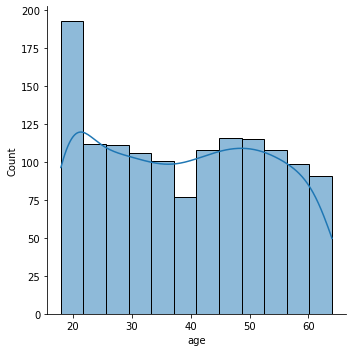

In [ ]:
# 연속형 변수 히스토그램으로 분포 확인하기
sns.displot(data['age'],kde=True)

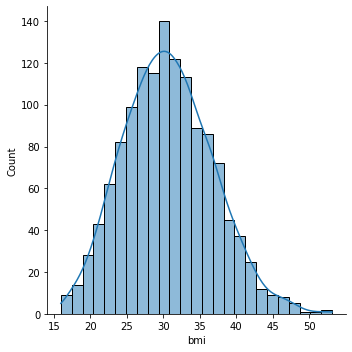

In [ ]:
# bmi 변수 히스토그램으로 확인하기
sns.displot(data['bmi'],kde=True)

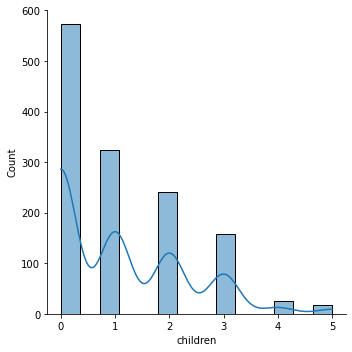

In [ ]:
sns.displot(data['children'],kde=True)

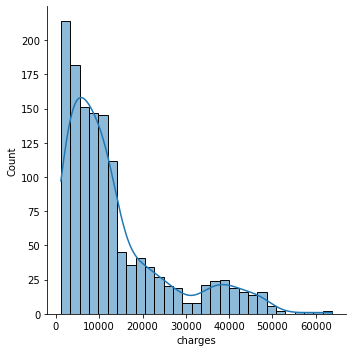

In [ ]:
sns.displot(data['charges'],kde=True)

<AxesSubplot:ylabel='age'>

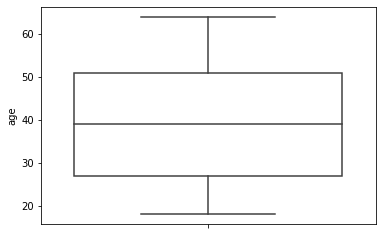

In [ ]:
# 연속형 데이터 Box Plot 시각화
sns.boxplot(y=data['age'], data=data, boxprops={'facecolor': 'None'})

<AxesSubplot:ylabel='bmi'>

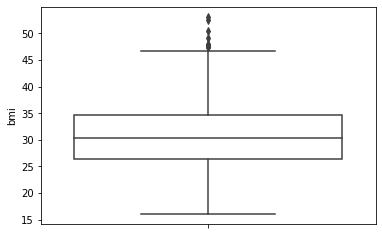

In [ ]:
sns.boxplot(y=data['bmi'], data=data, boxprops={'facecolor': 'None'})

<AxesSubplot:ylabel='children'>

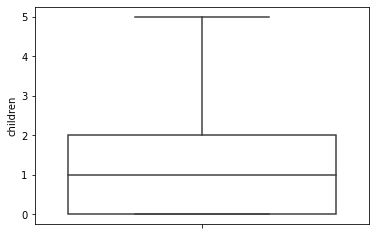

In [ ]:
sns.boxplot(y=data['children'], data=data, boxprops={'facecolor': 'None'})

<AxesSubplot:ylabel='charges'>

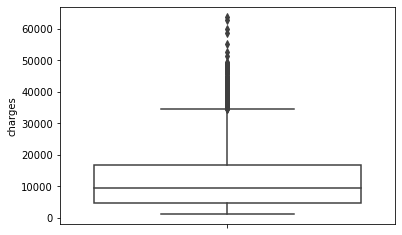

In [ ]:
sns.boxplot(y=data['charges'], data=data, boxprops={'facecolor': 'None'})

### 5) 연속형 변수 상관관계 살펴보기

<AxesSubplot:>

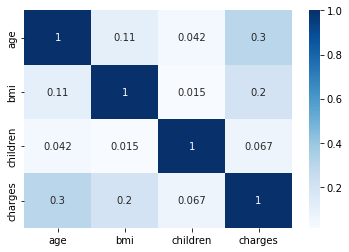

In [ ]:
# Seaborn Heatmap 을 사용한 Correlation 시각화
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

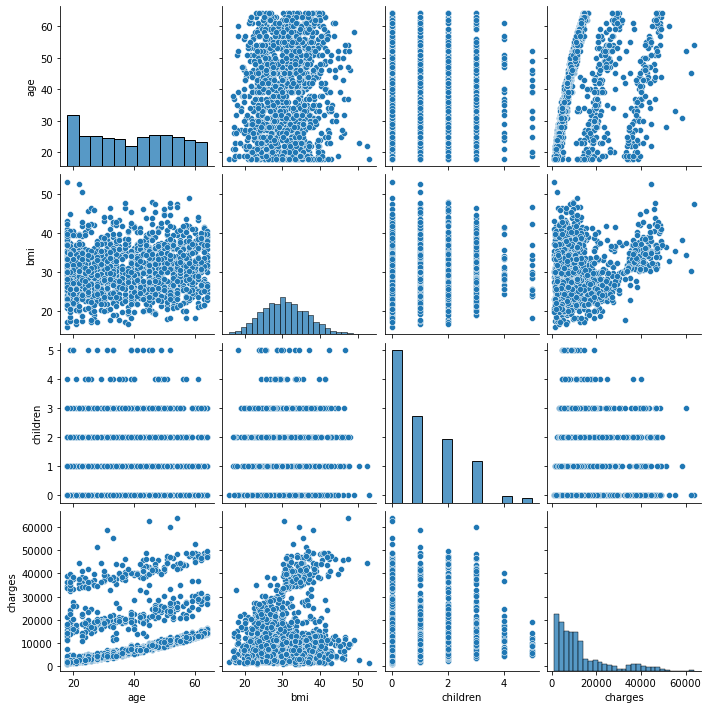

In [ ]:
# 숫자 변수형 컬럼들 간 Pairplot 그리기
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

### 6) 데이터 분할하기

In [ ]:
# 연속형 데이터들 추출
X_num = data[['age', 'bmi', 'children']]
X_num.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [ ]:
# 변환했던 범주형 데이터들과 concat 을 사용하여 합치기
X_final = pd.concat([X_num, data_dum], axis = 1)
X_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# 타겟 값 설정
y_final = data[['charges']]
y_final.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Training, Test 나누기 (Training:Test=7:3)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0)

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
196,39,32.800,0,1,0,1,0,0,0,0,1
1103,58,36.080,0,0,1,1,0,0,0,1,0
183,44,26.410,0,1,0,1,0,0,1,0,0
1298,33,27.455,2,0,1,1,0,0,1,0,0
471,18,30.115,0,1,0,1,0,1,0,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 196 to 685
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               935 non-null    int64  
 1   bmi               935 non-null    float64
 2   children          935 non-null    int64  
 3   sex_female        935 non-null    uint8  
 4   sex_male          935 non-null    uint8  
 5   smoker_no         935 non-null    uint8  
 6   smoker_yes        935 non-null    uint8  
 7   region_northeast  935 non-null    uint8  
 8   region_northwest  935 non-null    uint8  
 9   region_southeast  935 non-null    uint8  
 10  region_southwest  935 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 36.5 KB


In [ ]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1248,18,39.82,0,1,0,1,0,0,0,1,0
610,47,29.37,1,1,0,1,0,0,0,1,0
393,49,31.35,1,0,1,1,0,1,0,0,0
503,19,30.25,0,0,1,0,1,0,0,1,0
198,51,18.05,0,1,0,1,0,0,1,0,0


### 7) 연속형 변수 scaling하기

In [ ]:
# 연속형 변수 scaling 작업

# 1. MinMaxScaler 를 사용하는 경우

#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.transform(X_test.astype(np.float))

In [ ]:
## 2. StandardScaler 를 사용하는 경우

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float)) # train 데이터만 학습하기 때문에 fit_transform() 사용
X_test= s_scaler.transform(X_test.astype(np.float))
# test 데이터는 fit(즉 학습)은 하지 않고 train 데이터에서 생성된 파라미터로 transform만 수행


C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


### 8) 회귀분석 하기


*   fit()
*   predict()
*   score()



In [ ]:
# fit model
lr = LinearRegression().fit(X_train,y_train)

In [ ]:
# predict
y_test_pred = lr.predict(X_test)


In [ ]:
# Score 확인
R_score1 = lr.score(X_test, y_test)
print(' R score:',  R_score1)

 R score: 0.763211785127434


In [ ]:
print("회귀계수_: {}".format(lr.coef_))

회귀계수_: [[ 3.41298246e+03  1.80247169e+03  5.70348577e+02 -4.04191188e+16
  -4.04191188e+16 -6.12604750e+16 -6.12604750e+16  3.50851208e+16
   3.52481675e+16  3.66427750e+16  3.59734923e+16]]


In [ ]:
coef = [3.41298246e+03,  1.80247169e+03,  5.70348577e+02, -4.04191188e+16,-4.04191188e+16, -6.12604750e+16, -6.12604750e+16,  3.50851208e+16,
   3.52481675e+16,  3.66427750e+16,  3.59734923e+16]
col = X_final.columns

In [ ]:
data_coef = pd.DataFrame({'col' : col, 'coef' : coef})

In [ ]:
data_coef

,col,coef
0,age,3.412982e+03
1,bmi,1.802472e+03
2,children,5.703486e+02
3,sex_female,-4.041912e+16
4,sex_male,-4.041912e+16
5,smoker_no,-6.126048e+16
6,smoker_yes,-6.126048e+16
7,region_northeast,3.508512e+16
8,region_northwest,3.524817e+16
9,region_southeast,3.664278e+16
